<a href="https://colab.research.google.com/github/vineel-M/Project/blob/main/Interchange_Group_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Overview**

Interchange Group, Inc. is a third-party logistics company based in Harrisonburg, Virginia. One
of the services they provide is to blast freeze poultry products. The company received a grant
to build the blast freezer and they want to increase the throughput of meat from Virginia that is
processed. To that end, the company would like to evaluate policies by which they request
suppliers to bring trucks of poultry.
The question that we seek to answer with this project is: how many trucks should Interchange
schedule to deliver poultry each week?
The freezer has 288 cells, each of which can hold one pallet at a time. Assume that all cells are
available at the beginning of each week, so that the total freezing time available is
288 cells × 24 hours
day × 5 days = 34,560 hours each week.
A truck can carry 24 pallets. We will assume that all trucks carry full loads. You will be provided
historical data on past shipments – there will be data for each pallet including the date, receipt
number (the truck on which it arrived), and the product (e.g., chicken wings or breasts). For
each product, there is a table with the freezing time.
Interchange can call suppliers at the beginning of the week and ask for a number of trucks of
product, but the type of product is unknown.

The only source of uncertainty is the required processing time for each pallet. Define a
distribution in the absence of data. Do not sequence or place the pallets in cells but keep track
of total processing time to check if it exceeds 34,560 hours.
Develop a simulation model that prescribes how many trucks to schedule for a week. How
many trucks can be scheduled in a week so that there is at most a 50% chance the processing
time does not exceed 34,560 hours? How many trucks can be scheduled in a week so that
there is at most a 5% chance that the processing time does not exceed 34,560 hours?

**Final Report**

For the final report, use historical data to find a distribution for the processing time of each
pallet. Update the simulation to use sample the new distribution. Do the results change?
Use the historical data to calculate the total processing time for all pallets delivered each week.
Describe the distribution of total processing time in one week.
Based on an analysis of the historical data, derive a new estimate for the total processing time
available for a week. Re-run the simulation with the new value for the total processing time
available for a week. Determine the number of trucks to schedule each day so that there is at
most a 50% chance that the processing time available is exceeded. Determine the number of
trucks for each scenario so that there is at most a 5% chance the processing time available is
exceeded

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Add our 645 folder to the path

In [ ]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/645")   #creating a path

Import brooks.py code

In [ ]:
from brooks import *

Import other libraries

In [ ]:
import pandas as pd   #for importing data
import seaborn as sns   #for creating plots
import numpy as np    #for generating random samples
import matplotlib.pyplot as plt


Read data

In [ ]:
## For the processing time for each pallet

my_data = pd.read_excel("/content/drive/MyDrive/645/Project_Final_Data_Filtered.xlsx", sheet_name="Sheet1")
print(my_data["Hours"])

## For the processing time for all pallets delivered each week

# Load the data from the Excel file
my_data = pd.read_excel("/content/drive/MyDrive/645/Project_Final_Data_Filtered.xlsx", sheet_name="Sheet1")
# Convert the "Date" column to datetime type
my_data["Date"] = pd.to_datetime(my_data["Date"])
# Group the data by week and calculate the sum of processing time for each week
weekly_processing_time = my_data.groupby(my_data["Date"].dt.week)["Hours"].sum().reset_index()
# Rename the columns for clarity
weekly_processing_time.columns = ["Week", "Total Processing Time (Hours)"]
# Print the result
print(weekly_processing_time)


0        61.5
1        61.5
2        61.5
3        72.0
4        72.0
         ... 
16719    46.0
16720    46.0
16721    46.0
16722    46.0
16723    43.0
Name: Hours, Length: 16724, dtype: float64
    Week  Total Processing Time (Hours)
0      1                       15561.50
1      2                       15869.75
2      3                       24679.75
3      4                       18614.50
4      5                       13885.50
5      6                       14970.00
6      7                       16318.75
7      8                       21025.00
8      9                       19298.00
9     10                       15024.75
10    11                       19600.25
11    12                       17569.50
12    13                       22432.00
13    14                       15471.25
14    15                       18403.50
15    16                       16001.50
16    17                       14429.25
17    18                       14438.50
18    19                       15123.75
19 

<ipython-input-5-e7c983f6a4fe>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_processing_time = my_data.groupby(my_data["Date"].dt.week)["Hours"].sum().reset_index()


Fit a distribution

<Axes: xlabel='Hours', ylabel='Count'>

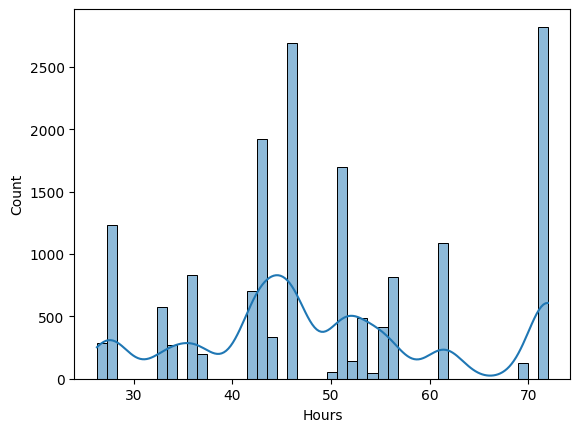

In [ ]:
sns.histplot(my_data["Hours"], kde=True) # total processing time of eah pallet
#sns.histplot(weekly_processing_time["Total Processing Time (Hours)"], kde=True)  # total processing time of all palet each week

Conduct a chi-square test

In [ ]:
# For the total processing time of eaeh pallet
(my_mean, my_std) = test_distribution(my_data['Hours'], distribution="normal")
(my_alpha, my_beta) = test_distribution(my_data["Hours"], distribution="gamma")
(min, mode, max) = test_distribution(my_data["Hours"], distribution="triangular")

# For the total processing time for all pallets delivered each week
(my_mean, my_std) = test_distribution(weekly_processing_time["Total Processing Time (Hours)"], distribution="normal")
(my_alpha, my_beta) = test_distribution(weekly_processing_time["Total Processing Time (Hours)"], distribution="gamma")
(min, mode, max) = test_distribution(weekly_processing_time["Total Processing Time (Hours)"], distribution="triangular")

For a normal distribution, the mean estimate is 49.624955 and the standard deviation estimate is 13.389290.
The test statistic for a normal distribution is 94608.142639 and the p-value is 0.000000.
For a gamma distribution, the alpha estimate is 13.421428 and the 1/beta estimate is 3.697442.
The test statistic for a gamma distribution is 96970.811010 and the p-value is 0.000000.
For a triangular distribution, the min estimate is 15.448938, the mode estimate is 72.000000, and the max estimate is 72.003638.
The test statistic for a triangular distribution is 63762.080041 and the p-value is 0.000000.
For a normal distribution, the mean estimate is 15960.149038 and the standard deviation estimate is 3195.510397.
The test statistic for a normal distribution is 4.834841 and the p-value is 0.680110.
For a gamma distribution, the alpha estimate is 25.321580 and the 1/beta estimate is 630.298301.
The test statistic for a gamma distribution is 3.244821 and the p-value is 0.861469.
For a triangul

In [ ]:
# A new estimate for the total processing time available for a week
gamma_mean = np.mean(weekly_processing_time["Total Processing Time (Hours)"])
print(gamma_mean)

15960.149038461539


Sampling data

In [ ]:
rg = np.random.default_rng(12345)
for i in range(10):
  print(rg.normal(49.624955 , 13.389290))   # sampling freezing times for each pallet


30.56094867764837
66.54538180714351
37.96741249856179
46.15480939722522
48.6161616128771
39.705035536676675
31.311181855944653
58.313168907475244
54.45926678254477
23.477505119041513


Our Simulation

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# total_freezing_time_per_week = 34,560 hrs  # when we didn't have data

# total_freezing_time_per_week = 15,960.149 hrs # when got the real data

trucks_scheduled_list = range(10, 41, 5)  # decisions or policies 10, 15, 20, 25, 30 ,35, 40 trucks

n = 1000
for trucks in trucks_scheduled_list:
    rg = np.random.default_rng(12345)   # set seed for every decision
    print(trucks)
    total_freezing_time_per_week = []   # keep track of freezing time for every decision

    for i in range(n):   # simulate the total freezing time per week for every decision 1000 iterations
        total_freezing_time = 0
        pallets_in_truck = 24*trucks   # total pallets for every decision

        for pallets in range(pallets_in_truck):   # sampling a freezing time for each pallet
            freezing_time = rg.normal(49.624955 , 13.389290)   # normal freezing times
            total_freezing_time += freezing_time    # total freezing time per week for every iteration
        total_freezing_time_per_week.append(total_freezing_time)

    print("Total freezing time per week: %f" % (sum(total_freezing_time_per_week)/n))  # total freezing time per week for each decision

    fifty_perc = np.percentile(total_freezing_time_per_week, q=50)
    print ("50th percentile for total freezing time per week: %f" % (fifty_perc))
    ninty_five_perc = np.percentile(total_freezing_time_per_week, q=95)
    print ("95th percentile for total freezing time per week: %f" % (ninty_five_perc))

    # Crideble intervals to see the results of the percentile
    #plt.figure()
    #sns.histplot(total_freezing_time_per_week)
    #plt.title(f'Trucks: {trucks}')
    #plt.xlabel('Total Freezing Time per Week')
    #plt.ylabel('Frequency')
    #plt.show()

10
Total freezing time per week: 11915.105015
50th percentile for total freezing time per week: 11915.214956
95th percentile for total freezing time per week: 12263.915793
15
Total freezing time per week: 17874.465702
50th percentile for total freezing time per week: 17864.606223
95th percentile for total freezing time per week: 18307.486919
20
Total freezing time per week: 23829.173469
50th percentile for total freezing time per week: 23825.105772
95th percentile for total freezing time per week: 24316.169402
25
Total freezing time per week: 29791.267060
50th percentile for total freezing time per week: 29797.159358
95th percentile for total freezing time per week: 30365.001744
30
Total freezing time per week: 35752.378686
50th percentile for total freezing time per week: 35743.191900
95th percentile for total freezing time per week: 36350.597335
35
Total freezing time per week: 41710.181639
50th percentile for total freezing time per week: 41697.383016
95th percentile for total freez

ChatGPT Simulation

In [ ]:
import numpy as np

# Set seed for reproducibility
rg = np.random.default_rng(12345)

# Define parameters for the triangular distribution
min_time = 7
mode_time = 65
max_time = 72

# Define constants
total_cells = 288
hours_per_day = 24
days_per_week = 5
available_hours = total_cells * hours_per_day * days_per_week
truck_capacity = 24

# Initialize results list
results = []

# Simulate different policies
for num_trucks in range(10, 41, 5):  # Try policies with 10 to 40 trucks with increment of 5
    total_processing_time = 0

    for _ in range(num_trucks):
        for _ in range(truck_capacity):
            processing_time = rg.triangular(min_time, mode_time, max_time)
            total_processing_time += processing_time

    if total_processing_time > available_hours:
        num_trucks -= 1

    results.append((num_trucks, total_processing_time))

# Print the results
for num_trucks, processing_time in results:
    print(f"Policy {num_trucks}: Total Processing Time = {processing_time} hours")

Policy 10: Total Processing Time = 11304.690779813805 hours
Policy 15: Total Processing Time = 17152.562572811657 hours
Policy 20: Total Processing Time = 22895.84377113791 hours
Policy 25: Total Processing Time = 28837.045578224675 hours
Policy 29: Total Processing Time = 35014.62328152905 hours
Policy 34: Total Processing Time = 40133.61132606647 hours
Policy 39: Total Processing Time = 46016.9673027916 hours
